In [ ]:
!git clone https://github.com/oskioka2303/Fysikklab.git

Cloning into 'Fysikklab'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 6), reused 27 (delta 3), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [17]:
# Kjør denne kodeblokken når git-repoet oppdateres
%cd /content/Fysikklab/
!git pull

/content/Fysikklab
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/oskioka2303/Fysikklab
   61483cb..4b18b3a  main       -> origin/main
Updating 61483cb..4b18b3a
Fast-forward
 Kuledata/Datasett_10.txt | 45 +++++++++++++++++++++++++++++++++++++++++++++
 Kuledata/datasett_3.txt  | 42 ++++++++++++++++++++++++++++++++++++++++++
 kule.ipynb               |  2 +-
 3 files changed, 88 insertions(+), 1 deletion(-)
 create mode 100644 Kuledata/Datasett_10.txt
 create mode 100644 Kuledata/datasett_3.txt


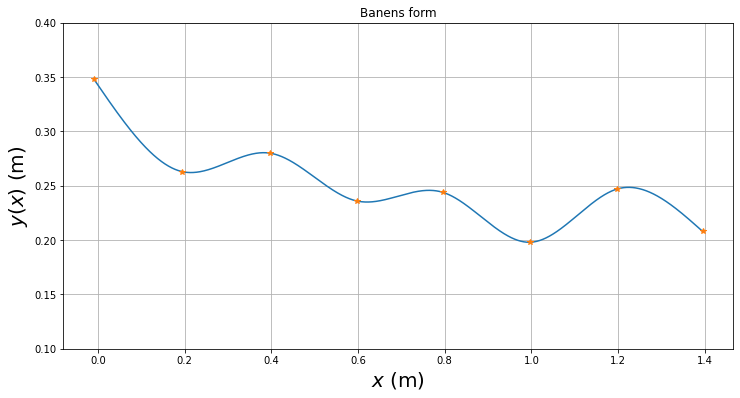

Sluttfart (datasett 1): 1.3620836150526083 m/s
Sluttfart (datasett 2): 1.2313870538301936 m/s
Sluttfart (datasett 3): 1.302710681279529 m/s

Den gjennomsnittlige farten er på 3.71 m/s
Standardavviket blir 1.5 
Standardfeilen er på 0.57 m/s
Farten til kula er dermed gitt ved 3.71 m/s +/- 0.57 m/s


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import CubicSpline
from math import sqrt
import statistics as st

x_vals = np.array([])
y_vals = np.array([])

#Test

with open('Fysikklab/kurve_data.txt', 'r') as f:
  reader = csv.reader(f, delimiter="\t")
  d = list(reader)[2:]
  for i, row in enumerate(d):
    for j, val in enumerate(row):
      d[i][j] = d[i][j].replace(',', '.')
      d[i][j] = float(d[i][j])
    x_vals = np.append(x_vals, d[i][0])
    y_vals = np.append(y_vals, d[i][1])


def get_datasett(filename):
  x_vals_k = np.array([])
  y_vals_k = np.array([])
  t_vals = np.array([])

  with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)[2:]
    for i, row in enumerate(d): 
      for j, val in enumerate(row):
        d[i][j] = d[i][j].replace(',', '.')
        d[i][j] = float(d[i][j])
      x_vals_k = np.append(x_vals_k, d[i][1])
      y_vals_k = np.append(y_vals_k, d[i][2])
      t_vals = np.append(t_vals, d[i][0])
    return x_vals_k, y_vals_k, t_vals

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,x_vals,y_vals,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0.10,0.40)
plt.grid()
plt.show()

h = 0.200
cs = CubicSpline(x_vals, y_vals, bc_type='natural')
sluttfart = np.array([])

for i in range(3):
  x_vals_k, y_vals_k, t_vals = get_datasett(f"Kuledata/datasett_{i + 1}.txt")

  xmin = x_vals[0]
  xmax = x_vals[len(x_vals) - 1]
  dx = 0.001
  x = np.arange(xmin, xmax, dx)  

  Nx = len(x)
  y = cs(x)
  dy = cs(x,1)
  d2y = cs(x,2)

  dx = x_vals_k[len(x_vals_k) - 1] - x_vals_k[len(x_vals_k) - 2]
  dy = y_vals_k[len(y_vals_k) - 1] - y_vals_k[len(y_vals_k) - 2]
  ds = sqrt(dx**2 + dy**2)
  dt = t_vals[len(t_vals) - 1] - t_vals[len(t_vals) - 2]
  v_slutt = ds/dt
  sluttfart = np.append(sluttfart, )
  print(f"Sluttfart (datasett {i + 1}):", v_slutt, "m/s")


print()

data_fart = [2,4,5,2,3,4,6]  #eksempel

gjennomsnitt = st.mean(data_fart)
standardavvik = st.stdev(data_fart)
standardfeil = standardavvik/np.sqrt(len(data_fart))

print(f'Den gjennomsnittlige farten er på {round(gjennomsnitt,2)} m/s')
print(f'Standardavviket blir {round(standardavvik,2)} ')
print(f'Standardfeilen er på {round(standardfeil,2)} m/s')
print(f'Farten til kula er dermed gitt ved {round(gjennomsnitt,2)} m/s +/- {round(standardfeil,2)} m/s') #Må finne et fornuftig antall gjelende siffer

